Todos devices: {'/cpu:0': []}
####### Calculating on the /cpu:0 #######
{'/cpu:0': [0.7611141204833984, 0.9495096206665039, 1.2992866039276123, 1.407411813735962, 2.224921464920044, 2.779550313949585, 3.4322919845581055]}


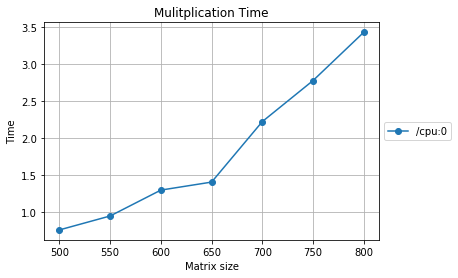

In [2]:
from __future__ import print_function
import matplotlib
import tensorflow as tf
import time
from tensorflow.python.client import device_lib
import numpy as np 
import matplotlib.pyplot as pplot

def get_times(devs, matrix_sizes):
    device_times = dict()
    
    for d in devs:
        device_times[d] = []

    print("Todos devices: %s" % device_times)
    
    for device_name in device_times.keys():
        print("####### Calculating on the " + device_name + " #######")
        for size in matrix_sizes:
            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)
                
            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    device_times[device_name].append(time_taken)
#                     print("device: %s Size: %s Time: %s" % (device_name,size, time_taken))
    
    return device_times

# Lista devices disponíveis:
# "/cpu:0": The CPU of your machine.
# "/gpu:0": The GPU of your machine, if you have one.
# "/gpu:1": The second GPU of your machine, etc.
    
local_devices = device_lib.list_local_devices()
devices = [x.name for x in local_devices]
matrix_sizes = range(500,850,50)
device_times = get_times(devices, matrix_sizes)
print(device_times)

# Plota resultados
pplot.figure()
pplot.title("Mulitplication Time")
pplot.xlabel('Matrix size')
pplot.ylabel('Time')
pplot.grid()
for d in device_times:
    pplot.plot(matrix_sizes[:len(device_times[d])], device_times[d], 'o-', label=d)
pplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pplot.show()


In [2]:
# Testa no device default, sem espeficiar qual device será usado na Session
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tensorflow.python.client import device_lib
import numpy as np 

def get_times(matrix_sizes):
    device_times = dict()
    device_times["teste"] = []

    print("####### Calculating #######")
    for size in matrix_sizes:
        shape = (size,size)
        data_type = tf.float16
        r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
        r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
        dot_operation = tf.matmul(r2, r1)

        with tf.Session() as session:
            start_time = time.time()
            result = session.run(dot_operation)
            time_taken = time.time() - start_time
            device_times["teste"].append(time_taken)
            print("Size: %s Time: %s" % (size, time_taken))

    return device_times

matrix_sizes = range(500,850,50)
device_times = get_times(matrix_sizes)


####### Calculating #######
Size: 500 Time: 1.3599655628204346
Size: 550 Time: 1.8012802600860596
Size: 600 Time: 2.4217376708984375
Size: 650 Time: 3.029149293899536
Size: 700 Time: 3.670607089996338
Size: 750 Time: 4.531220436096191
Size: 800 Time: 5.456874132156372
